## 1. Preparation

In [1]:
# 1.Explore this dataset using what you have learned in data preprocessing and data visualization 

### Loading the librairies

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics


### Loading the data

In [3]:
house_df = pd.read_csv("kc_house_data.csv")
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
house_df.shape

(21613, 21)

In [7]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# let start by display the distribution of the column price

<AxesSubplot:xlabel='price'>

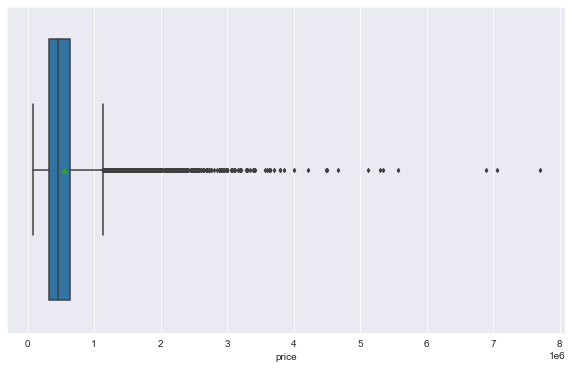

In [10]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'price', data = house_df, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True)

In [11]:
df_boxplot = house_df[['sqft_living', 'sqft_basement','sqft_above', 'sqft_living15']]
df_barplot = house_df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade']]

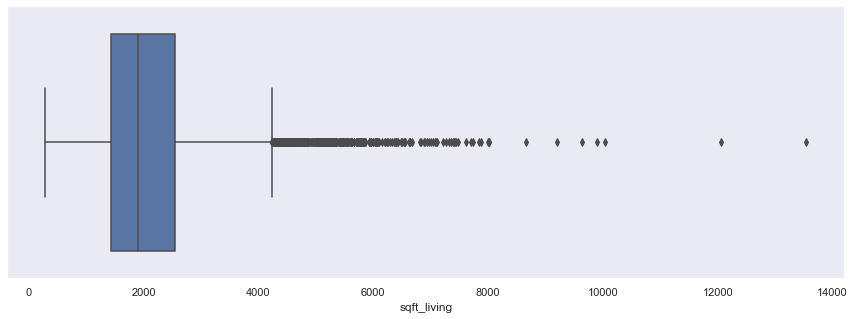

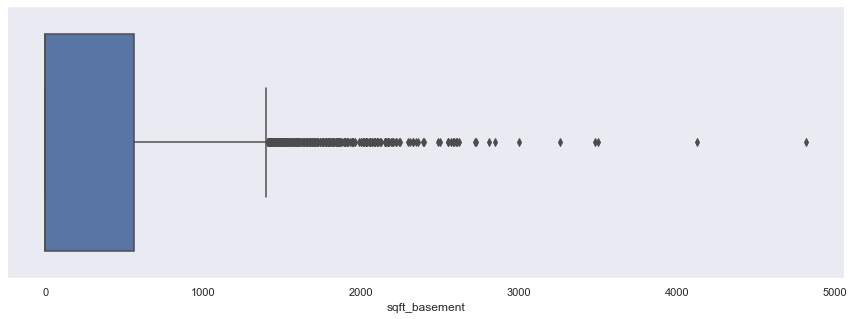

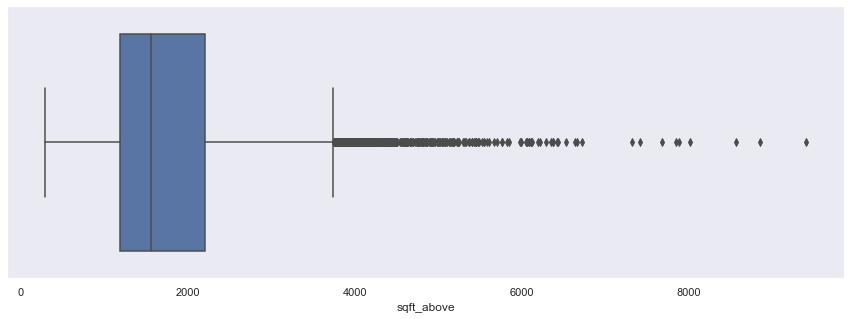

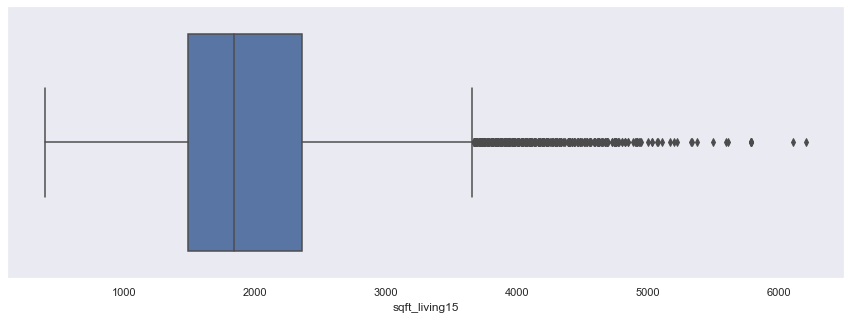

In [12]:
for i in df_boxplot.columns:
    sns.set(style='dark')
    plt.figure(figsize=(15,5))
    sns.boxplot(x=i, data=house_df)
    plt.show()

In [13]:
# let see the correlation between all the features we have

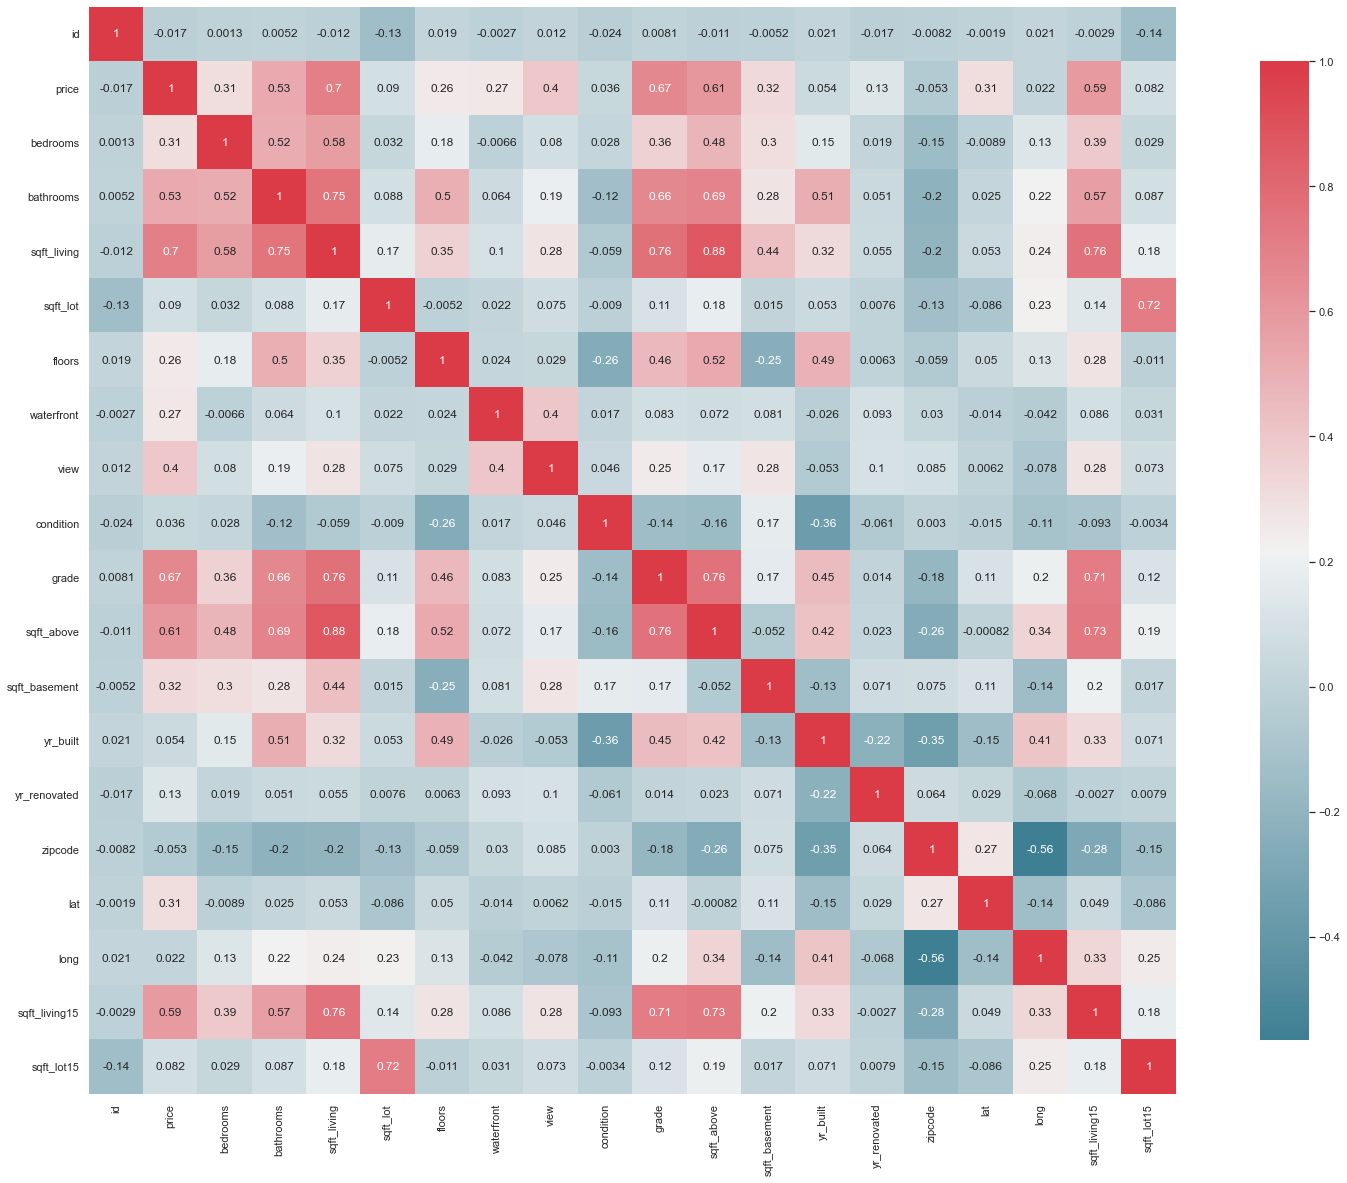

In [14]:
fig , ax = plt.subplots( figsize =( 30 , 20 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
fig = sns.heatmap( house_df.corr(), cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True)

#### from the above result and the dataframe we Notice:
   - The column ID is not important because it doesn't give any important contribution instead so we drop it
   - Columns Date must be transformed into Date time format and divided by year/ month

In [15]:
# Date Transformation
house_df['date'] = pd.to_datetime(house_df['date'])
house_df['year'] = house_df['date'].apply(lambda date: date.year)
house_df['month'] = house_df['date'].apply(lambda date: date.month)
# drop useless column (id,zipcode)
house_df.drop(['id','zipcode','date'], axis = 1 , inplace = True)

In [16]:
# 2. Write a paragraph selecting the most important features (feature selection).

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

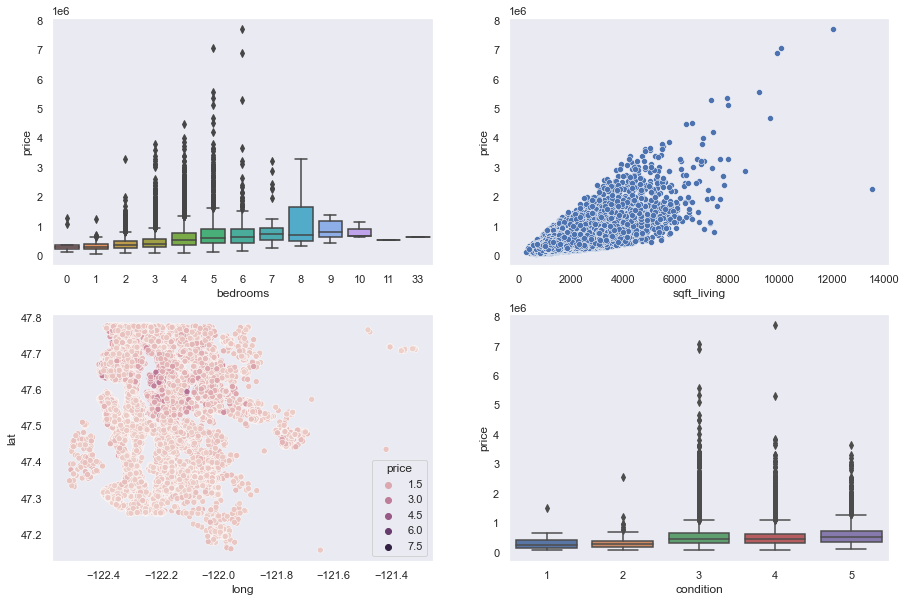

In [17]:
f,ax = plt.subplots(2,2, figsize = (15,10))
y = 'price'
sns.boxplot(x='condition', y=y, data=house_df , ax = ax[1,1])
sns.scatterplot(x='sqft_living',y=y ,data=house_df , ax = ax[0,1])
sns.scatterplot(x='long',y='lat',hue=y ,data=house_df , ax = ax[1,0])
sns.boxplot(x='bedrooms',y=y ,data=house_df , ax = ax[0,0])

#### We can notice that 
-  from the 1 st graph : the more bedrooms a house has the more it will be more expensive
- from  the 2nd graph:  we can notice a linear relation between sqft living that means  the bigger the house is the more    it will be more expensive
- from the 3rd graph:   a combination of longitude and latitude plus price segmentation , the darker the color is the more expensive the house would be
- from graph4:  we notice that   the house condition are not all the featuresthat effect  the final price 
 dots in the 4 graphs can be Outliers( houses that are super expensive / super cheap)  so we have to remove them , so we have to make some transformation

In [18]:
# Data Modification

#### Finding Ouliers

In [19]:
df= house_df[['sqft_basement','sqft_living','yr_built','sqft_lot']]

<Figure size 720x432 with 0 Axes>

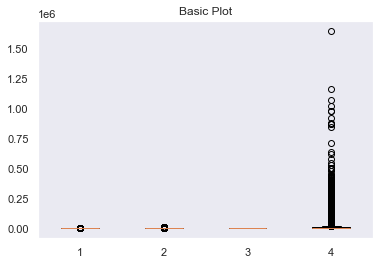

In [20]:
plt.figure (figsize = (10,6))
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df.dropna())
plt.show()

<Figure size 720x720 with 0 Axes>

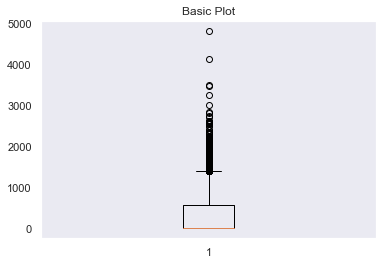

In [21]:
plt.figure (figsize = (10,10))
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df['sqft_basement'].dropna())
plt.show()

<Figure size 720x720 with 0 Axes>

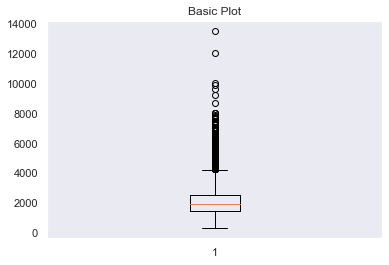

In [22]:
plt.figure (figsize = (10,10))
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df['sqft_living'].dropna())
plt.show()

<Figure size 720x720 with 0 Axes>

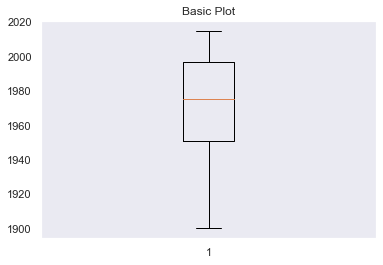

In [23]:
plt.figure (figsize = (10,10))
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df['yr_built'].dropna())
plt.show()

<Figure size 720x720 with 0 Axes>

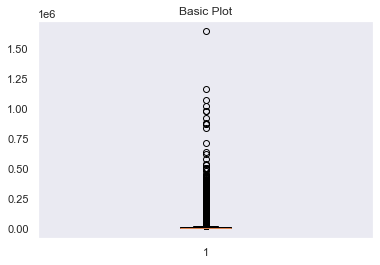

In [24]:
plt.figure (figsize = (10,10))
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df['sqft_lot'].dropna())
plt.show()

In [25]:
quantile1 = df['sqft_basement'].quantile([0.25,0.5,0.75])
quantile1

0.25      0.0
0.50      0.0
0.75    560.0
Name: sqft_basement, dtype: float64

In [26]:
quantile2 = df['sqft_living'].quantile([0.25,0.5,0.75])
quantile2

0.25    1427.0
0.50    1910.0
0.75    2550.0
Name: sqft_living, dtype: float64

In [27]:
quantile3 = df['yr_built'].quantile([0.25,0.5,0.75])
quantile3

0.25    1951.0
0.50    1975.0
0.75    1997.0
Name: yr_built, dtype: float64

In [28]:
quantile4 = df['sqft_lot'].quantile([0.25,0.5,0.75])
quantile4

0.25     5040.0
0.50     7618.0
0.75    10688.0
Name: sqft_lot, dtype: float64

In [29]:
IQR1 = quantile1[0.75] - quantile1[0.25]
IQR1

560.0

In [30]:
IQR2 = quantile2[0.75] - quantile2[0.25]
IQR2

1123.0

In [31]:
IQR3 = quantile3[0.75] - quantile3[0.25]
IQR3

46.0

In [32]:
IQR4 = quantile4[0.75] - quantile4[0.25]
IQR4

5648.0

In [33]:
out_min1 = quantile1[0.25] - 1.5 * IQR1
out_max1 = quantile1[0.75] + 1.5 * IQR1

In [34]:
out_min2 = quantile2[0.25] - 1.5 * IQR2
out_max2 = quantile2[0.75] + 1.5 * IQR2

In [35]:
out_min3 = quantile3[0.25] - 1.5 * IQR3
out_max3 = quantile3[0.75] + 1.5 * IQR3

In [36]:
out_min4 = quantile4[0.25] - 1.5 * IQR4
out_max4 = quantile4[0.75] + 1.5 * IQR4

In [37]:
T_ss_out1 = df[(df['sqft_basement'] > out_min1) & (df['sqft_basement'] < out_max1)].sqft_basement

In [38]:
T_ss_out2 = df[(df['sqft_living'] > out_min2) & (df['sqft_living'] < out_max2)].sqft_living

In [39]:
T_ss_out3 = df[(df['yr_built'] > out_min3) & (df['yr_built'] < out_max3)].yr_built

In [40]:
T_ss_out4 = df[(df['sqft_lot'] > out_min4) & (df['sqft_lot'] < out_max4)].sqft_lot

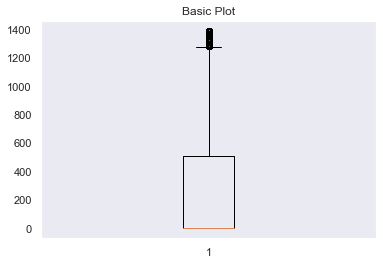

In [41]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(T_ss_out1.dropna())
plt.show()

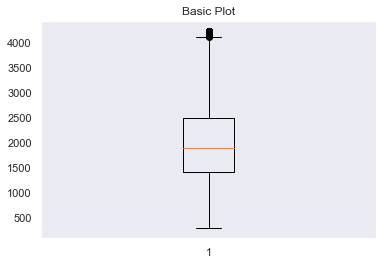

In [42]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(T_ss_out2.dropna())
plt.show()

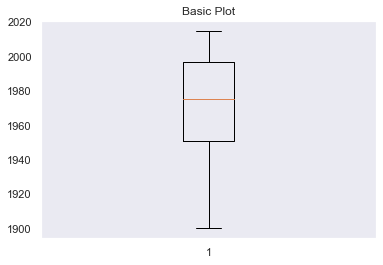

In [43]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(T_ss_out3.dropna())
plt.show()

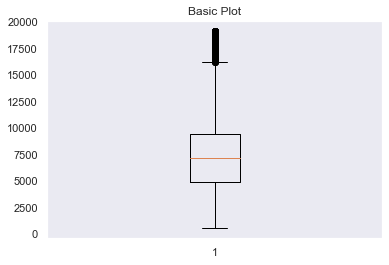

In [44]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(T_ss_out4.dropna())
plt.show()

### simple linear regression

In [48]:
# linear regression with one feature
x = house_df['sqft_living']
y = house_df['price']
x_train, x_test , y_train, y_test = train_test_split(x, y , test_size= 0.2)
x_train=np.array(x_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [49]:
model = LinearRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

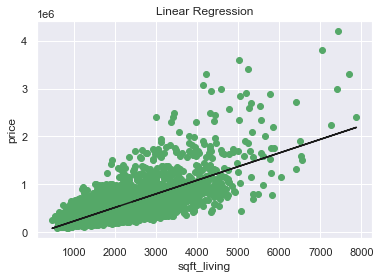

In [50]:
plt.scatter(x_test,y_test,color="g")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x_test,model.predict(x_test),color="k")
plt.show()

In [51]:
# Measure the performance of linear regression using the testing set. 

In [52]:
mse = mean_squared_error(y_pred , y_test)
score = r2_score(y_test, y_pred)
print("MSE : ",mse)
print("Score : ",score)

MSE :  60892242790.941216
Score :  0.49011914225278375


In [53]:
model.intercept_

array([-49044.57132982])

In [54]:
model.coef_

array([[284.12936514]])

### multi linear regression

In [56]:
#  Split your dataset into a training set and a testing set. 

In [57]:
X = house_df.drop('price',1)
Y=house_df['price']
X_train,X_test,Y_train,Y_test = train_test_split(X , Y , test_size= 0.3,random_state=42)

In [58]:
#  Apply Linear regression to your training set. 

In [59]:
model = LinearRegression()
model.fit(X_train,Y_train)
predections = model.predict(X_test)

In [60]:
# Plot the linear regression. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

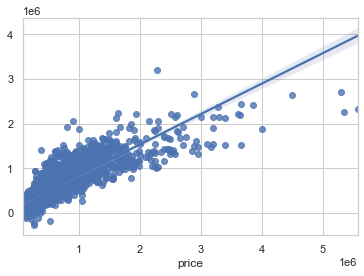

In [61]:
sns.set_style("whitegrid")
sns.regplot(Y_test,predections)

In [62]:
#  Measure the performance of linear regression using the testing set. 

In [63]:
print("score : ",r2_score(Y_test,predections))
mse = mean_squared_error(predections , Y_test)
print("MSE : ",mse)

score :  0.6959742861911888
MSE :  43891137818.59628


In [64]:
model.intercept_

-113670833.30168875

In [75]:
model.coef_

array([[284.12936514]])

#### comparaison : 
* we can notice that the performance of our model using multi linear regression if greter than when we use only one feauture for simple regression
* because we have eliminate a lot of feature that matter in the performance of our model 

### Polynomial regression

In [68]:
#  Split your dataset into a training set and a testing set. 

In [66]:
from sklearn.preprocessing import PolynomialFeatures
model = LinearRegression()
poly = PolynomialFeatures(degree=2)
poly.fit_transform(x_train)

model.fit(x_train , y_train)


LinearRegression()

In [ ]:
Apply Linear regression to your training set. 

In [69]:
poly.fit_transform(x_test)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_pred , y_test)
score = r2_score(y_test, y_pred)

In [70]:
#  Measure the performance of linear regression using the testing set.

In [71]:
print("MSE : ",mse)
print("Score : ",score)

MSE :  60892242790.941216
Score :  0.49011914225278375


In [72]:
model.intercept_

array([-49044.57132982])

In [73]:
model.coef_

array([[284.12936514]])

In [74]:
model = LinearRegression()
poly = PolynomialFeatures(degree=4)
poly.fit_transform(x_train)

model.fit(x_train , y_train)
poly.fit_transform(x_test)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_pred , y_test)
score = r2_score(y_test, y_pred)
print("MSE : ",mse)
print("Score : ",score)

MSE :  60892242790.941216
Score :  0.49011914225278375


#### comparaison :
* we can notice that the result of the ploynimial regression (r2) is really semilair to simple  regression (r2 = 0.49) and it is always less then multilinear regression